In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [3]:
# seeing the data
data = pd.read_csv("final_data7.csv")
print(data.shape)
# data.head()
data.keys()
data = data.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','Unnamed: 0.1.1.1','url'],axis=1)

(1819, 29)


In [3]:
#lets check whether the dataset is imbalance
print(data.keys())
data["label"].value_counts()

Index(['label', 'url_length', 'special_character_count', 'having_ip_address',
       'dns_response_time', 'handshake_time', 'data_time', 'data_length',
       'redirect', 'protocol', 'http_status_code', 'server_name',
       'scripts_count', 'iframe_count', 'external_link_count',
       'total_strings_count', 'average_string_length', 'max_len_strings',
       'strings_above_avglength', 'whois_creation_date', 'whois_expiry_date',
       'whois_last_updated', 'whois_country', 'whois_city'],
      dtype='object')


good    1598
bad      221
Name: label, dtype: int64

The dataset is highly imbalanced. Only 221 datapoints are malicious or phishing. i.e. only 12% of the data has class label 1

## Feature exploration
#### 1. URL_LENGTH

Number of unique values in URL_LENGTH 135
mean of URL_LENGTH 47.843320505772404


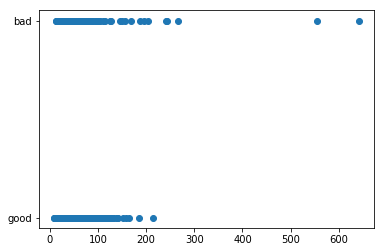

In [4]:
print("Number of unique values in URL_LENGTH",len(data["url_length"].value_counts()))
print("mean of URL_LENGTH",data["url_length"].mean())
plt.scatter(data["url_length"], data["label"])
plt.show()

In [5]:
#from the above plot we can see that if the length of the url is greater than 170, very few are good urls
#lets check that stats
length_greater_170 = data[data["url_length"] > 170]
print(length_greater_170.shape)
print(length_greater_170["label"].value_counts())

(10, 24)
bad     8
good    2
Name: label, dtype: int64


If the URL_LENGTH is too large then the chances of that website being suspicious is high

#### 2. NUMBER OF SPECIAL CHARACTERS

Number of unique special characters: 29
mean of NUMBER OF SPECIAL CHARACTERS 6.155579989004948


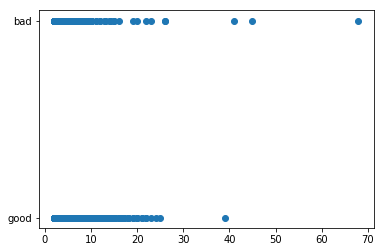

In [6]:
print("Number of unique special characters:", len(data["special_character_count"].value_counts()))
print("mean of NUMBER OF SPECIAL CHARACTERS",data["special_character_count"].mean())
plt.scatter(data["special_character_count"], data["label"])
plt.show()

In [7]:
#from the above plot we can see that if the NUMBER OF SPECIAL CHARACTERS is greater than 25, very few are good urls
#lets check that stats
SPCL_CHARS_25 = data[data["special_character_count"] > 25]
print(SPCL_CHARS_25.shape)
print(SPCL_CHARS_25["label"].value_counts())

(6, 24)
bad     5
good    1
Name: label, dtype: int64


If the number of special characters in an url is more than 25, most of cases the url turns out not to be good

/home/rajneesh/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


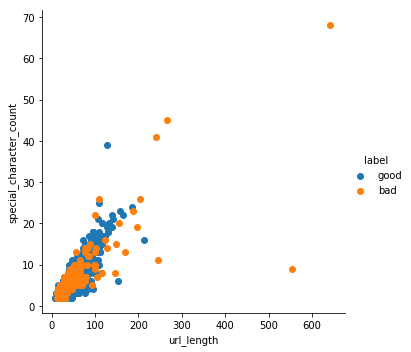

In [8]:
#lets check how these two feature together behaves with the class label
sns.FacetGrid(data, hue="label", size=5) \
   .map(plt.scatter, "url_length", "special_character_count") \
   .add_legend()
plt.show()

1. One thing to be noticed here is, if the URL_LENGTH is greater than 150 and NUMBER OF SPECIAL CHARACTERS is between 15 to 20, then the website is not legitimate.
2. Also, if the URL LENGTH is greater than 120 and NUMBER OF SPECIAL CHARACTERS is between 22 to 30, a remarkable number of malicious url are there.
Lets check that stats

In [9]:
data_120 = data[data["url_length"] > 100]
data_160 = data_120[data_120["url_length"] < 600]
data_22 = data_160[data_160["special_character_count"] > 22 ]
data_30 = data_22[data_22["special_character_count"] <= 30]
np.unique(data_30["label"],return_counts=True)

(array(['bad', 'good'], dtype=object), array([3, 3]))

We can see that,
>if url_length > 100 && url_length < 600 && number of character > 22 && number of characters < 30:
>>                "50 percent of time the url is malicious"

#### 3. HAVING IP ADDRESS

In [10]:
print(data.keys())
print("unique values:")
data["having_ip_address"].value_counts()

Index(['label', 'url_length', 'special_character_count', 'having_ip_address',
       'dns_response_time', 'handshake_time', 'data_time', 'data_length',
       'redirect', 'protocol', 'http_status_code', 'server_name',
       'scripts_count', 'iframe_count', 'external_link_count',
       'total_strings_count', 'average_string_length', 'max_len_strings',
       'strings_above_avglength', 'whois_creation_date', 'whois_expiry_date',
       'whois_last_updated', 'whois_country', 'whois_city'],
      dtype='object')
unique values:


0    1802
1      17
Name: having_ip_address, dtype: int64

In [11]:
temp1 = data[data["label"]=='good']
temp2 = data[data["label"]=='bad']
temp1_no_ip  = temp1[temp1["having_ip_address"]==0]
temp1_ip  = temp1[temp1["having_ip_address"]==1]
temp2_no_ip  = temp2[temp2["having_ip_address"]==0]
temp2_ip  = temp2[temp2["having_ip_address"]==1]
print("GOOD WITH IP : ",temp1_ip.shape[0])
print("BAD WITH IP : ",temp2_ip.shape[0])
print("GOOD WITHOUT IP : ",temp1_no_ip.shape[0])
print("BAD WITHOUT IP : ",temp2_no_ip.shape[0])

GOOD WITH IP :  1
BAD WITH IP :  16
GOOD WITHOUT IP :  1597
BAD WITHOUT IP :  205


Index(['label', 'url_length', 'special_character_count', 'having_ip_address',
       'dns_response_time', 'handshake_time', 'data_time', 'data_length',
       'redirect', 'protocol', 'http_status_code', 'server_name',
       'scripts_count', 'iframe_count', 'external_link_count',
       'total_strings_count', 'average_string_length', 'max_len_strings',
       'strings_above_avglength', 'whois_creation_date', 'whois_expiry_date',
       'whois_last_updated', 'whois_country', 'whois_city'],
      dtype='object')


/home/rajneesh/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


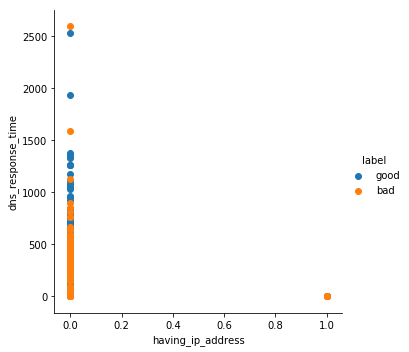

In [12]:
print(data.keys())
sns.FacetGrid(data, hue="label", size=5) \
   .map(plt.scatter, "having_ip_address", "dns_response_time") \
   .add_legend()
plt.show()

/home/rajneesh/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


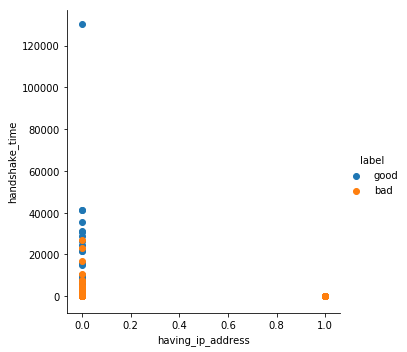

In [13]:
sns.FacetGrid(data, hue="label", size=5) \
   .map(plt.scatter, "having_ip_address", "handshake_time") \
   .add_legend()
plt.show()

/home/rajneesh/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


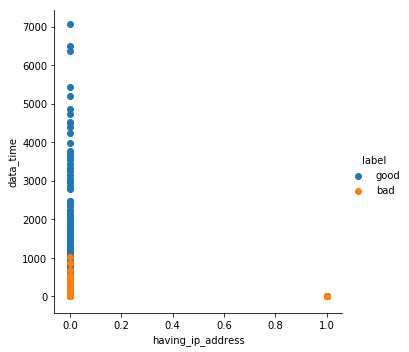

In [14]:
sns.FacetGrid(data, hue="label", size=5) \
   .map(plt.scatter, "having_ip_address", "data_time") \
   .add_legend()
plt.show()

/home/rajneesh/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


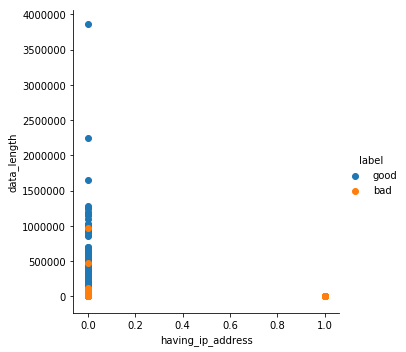

In [15]:
sns.FacetGrid(data, hue="label", size=5) \
   .map(plt.scatter, "having_ip_address", "data_length") \
   .add_legend()
plt.show()

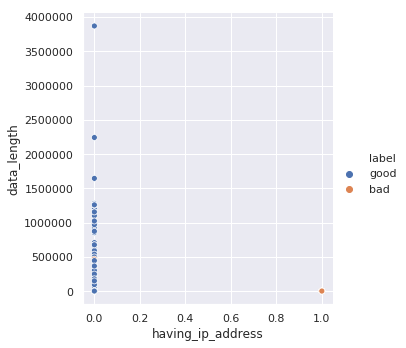

In [16]:
import seaborn as sns

sns.set(style="darkgrid")
# sns.set(style="ticks", color_codes=True)
# g = sns.pairplot(data)

sns.relplot(x="having_ip_address", y="data_length",hue='label', data=data)

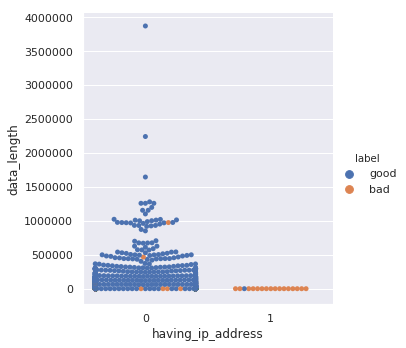

In [17]:
tips = data
sns.catplot(x="having_ip_address", y="data_length",hue='label',kind="swarm", data=tips);

Index(['label', 'url_length', 'special_character_count', 'having_ip_address',
       'dns_response_time', 'handshake_time', 'data_time', 'data_length',
       'redirect', 'protocol', 'http_status_code', 'server_name',
       'scripts_count', 'iframe_count', 'external_link_count',
       'total_strings_count', 'average_string_length', 'max_len_strings',
       'strings_above_avglength', 'whois_creation_date', 'whois_expiry_date',
       'whois_last_updated', 'whois_country', 'whois_city'],
      dtype='object')


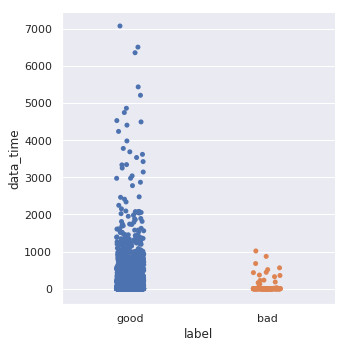

In [18]:
## data time
print(data.keys())
sns.catplot(y="data_time", x='label', data=tips);

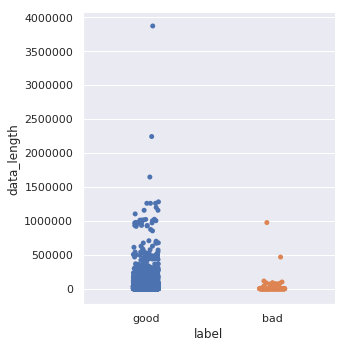

In [19]:
## data length
sns.catplot(y="data_length", x='label', data=tips);

In [20]:
data_true = data[data["label"]=="good"]
data_bad = data[data["label"]=="bad"]
data_true_len = data_true[data_true["data_length"]>1000000]

we here observe that with increasing value of length of data more and more of the urls are of good type and less are malignant.

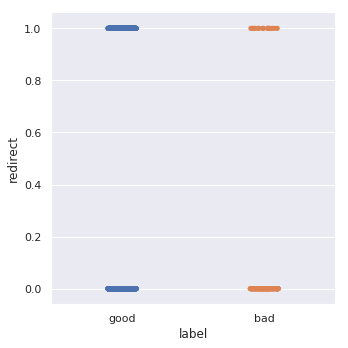

In [21]:
# redirect
sns.catplot(y="redirect", x='label', data=tips);

In [22]:
data_120 = data[data["redirect"] ==1]
data_160 = data[data["redirect"] ==0]


print("data with redirect true : "  , data_120["label"].value_counts())
print("data with redirect false : "  , data_160["label"].value_counts())



data with redirect true :  good    600
bad      23
Name: label, dtype: int64
data with redirect false :  good    974
bad     194
Name: label, dtype: int64


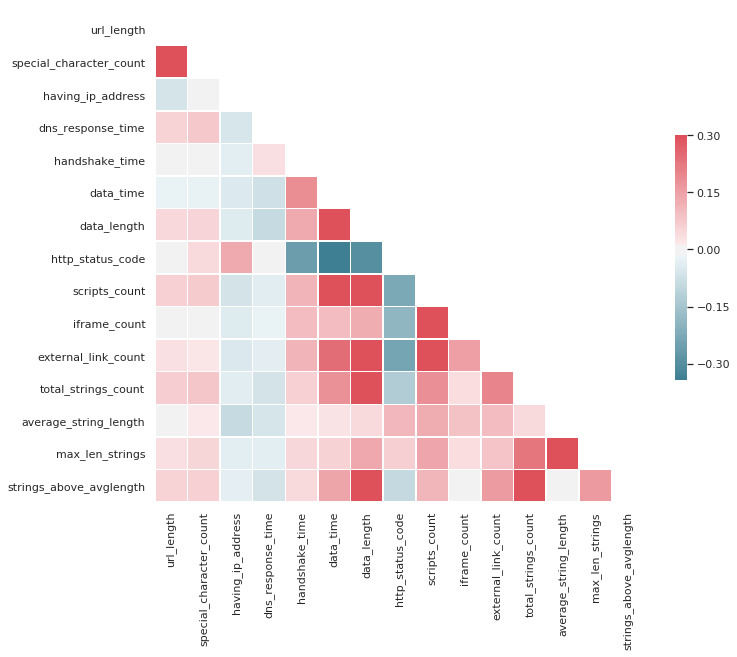

In [23]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = data
# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).get_figure().savefig("temp.png")

/home/rajneesh/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/rajneesh/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


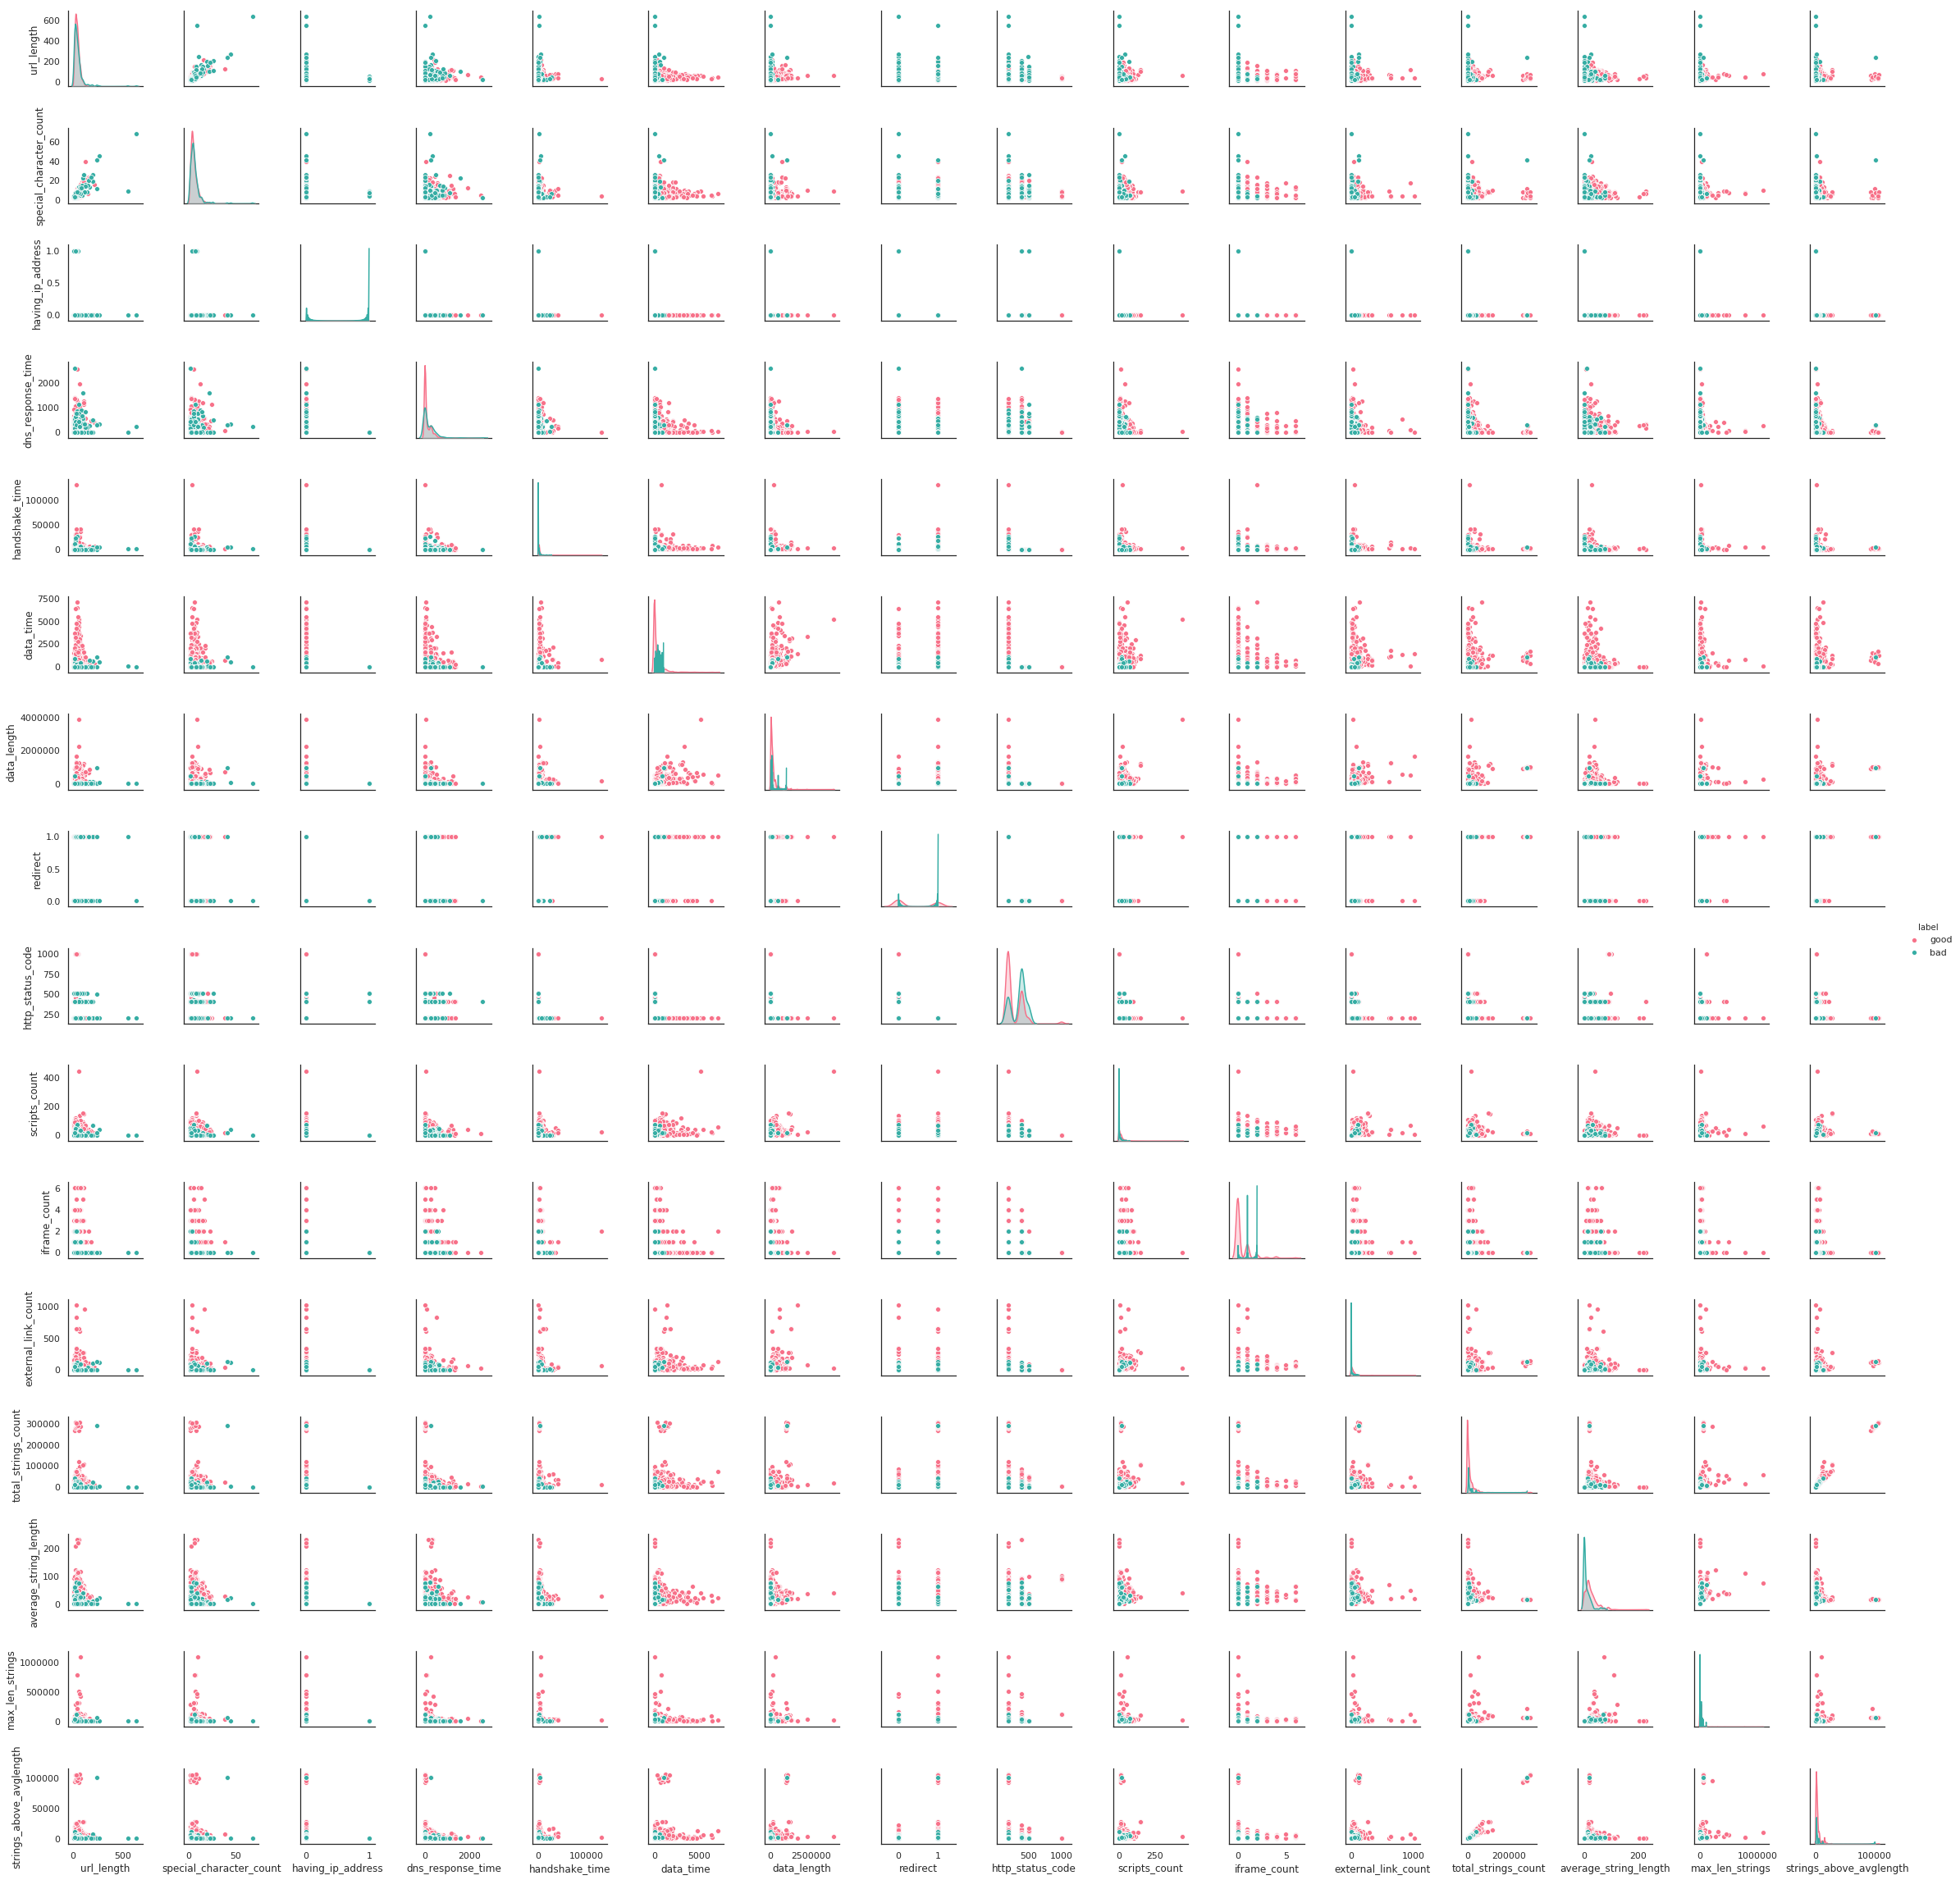

In [24]:
g = sns.pairplot(data, hue="label", palette="husl",height=2,aspect=1)

In [25]:
g.savefig("pairplot.png")

In [26]:
data.keys()

Index(['label', 'url_length', 'special_character_count', 'having_ip_address',
       'dns_response_time', 'handshake_time', 'data_time', 'data_length',
       'redirect', 'protocol', 'http_status_code', 'server_name',
       'scripts_count', 'iframe_count', 'external_link_count',
       'total_strings_count', 'average_string_length', 'max_len_strings',
       'strings_above_avglength', 'whois_creation_date', 'whois_expiry_date',
       'whois_last_updated', 'whois_country', 'whois_city'],
      dtype='object')

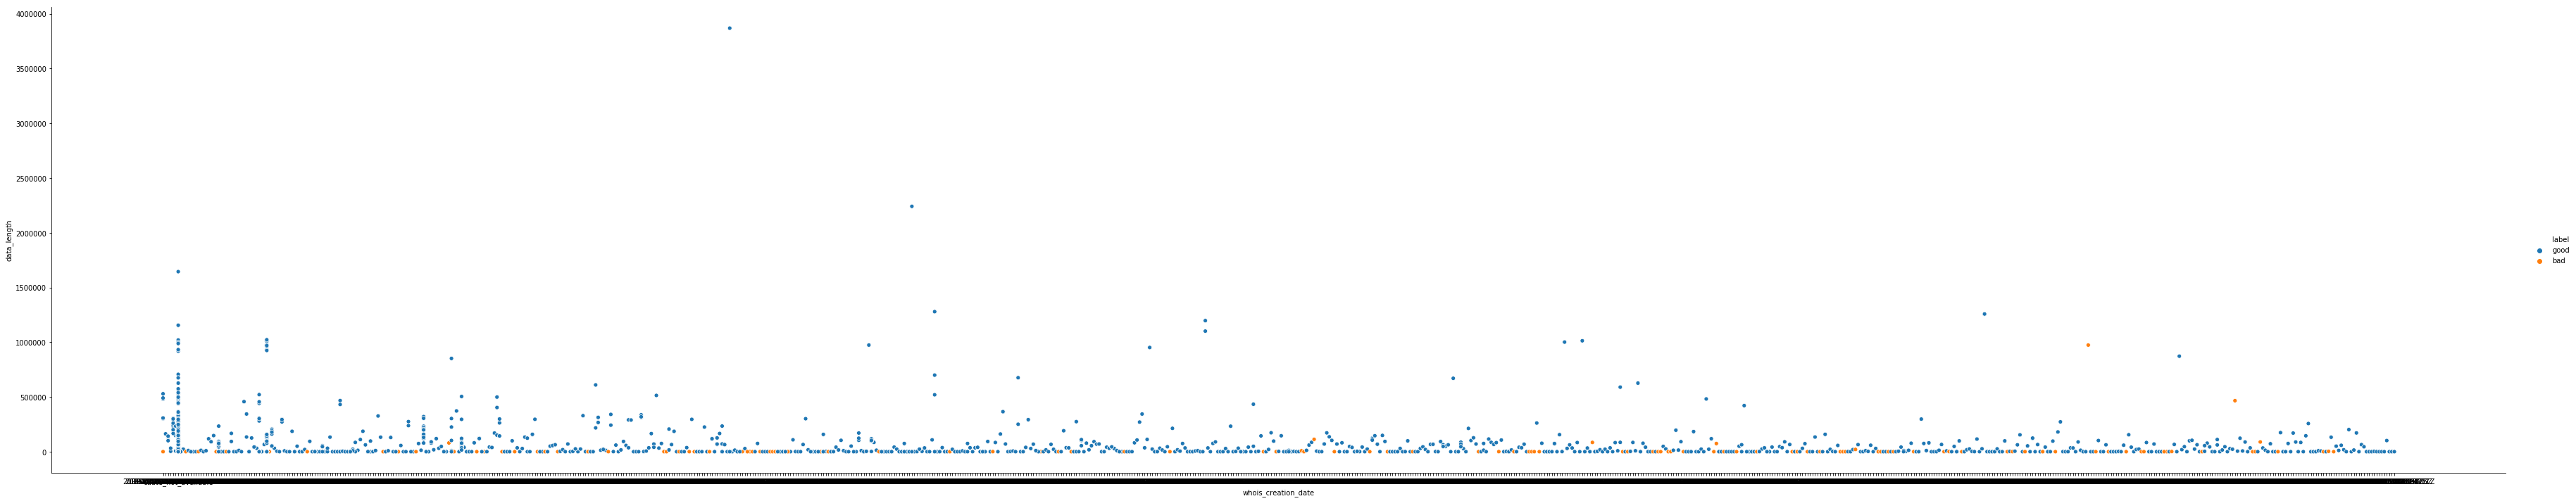

In [14]:
sns.relplot(x="whois_creation_date", y="data_length",hue='label', data=data, height=10, aspect=5).savefig("whois_date.png")

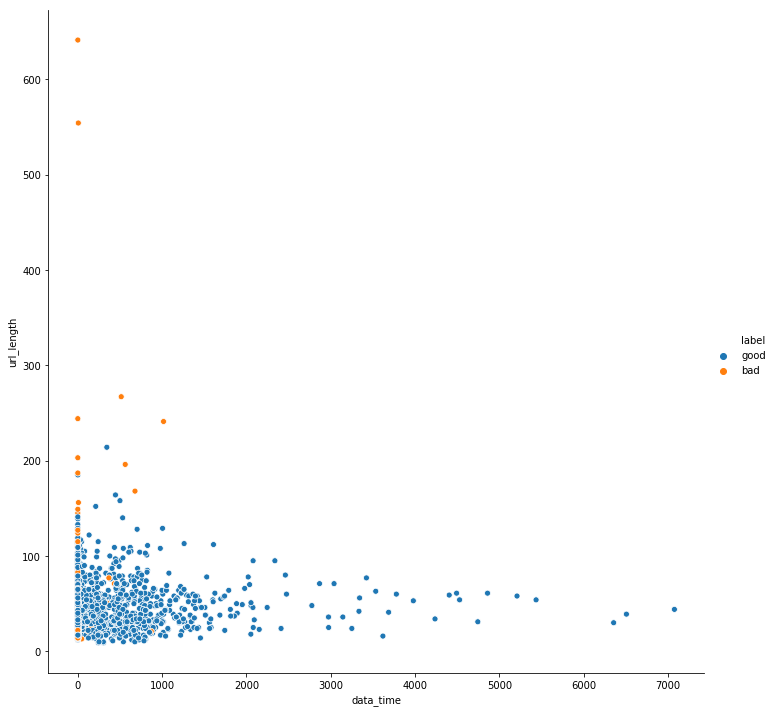

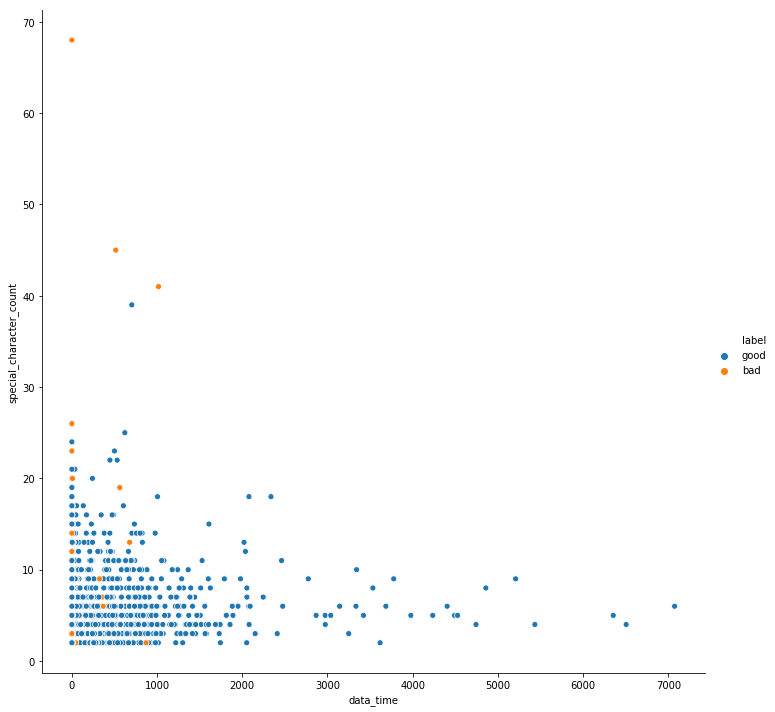

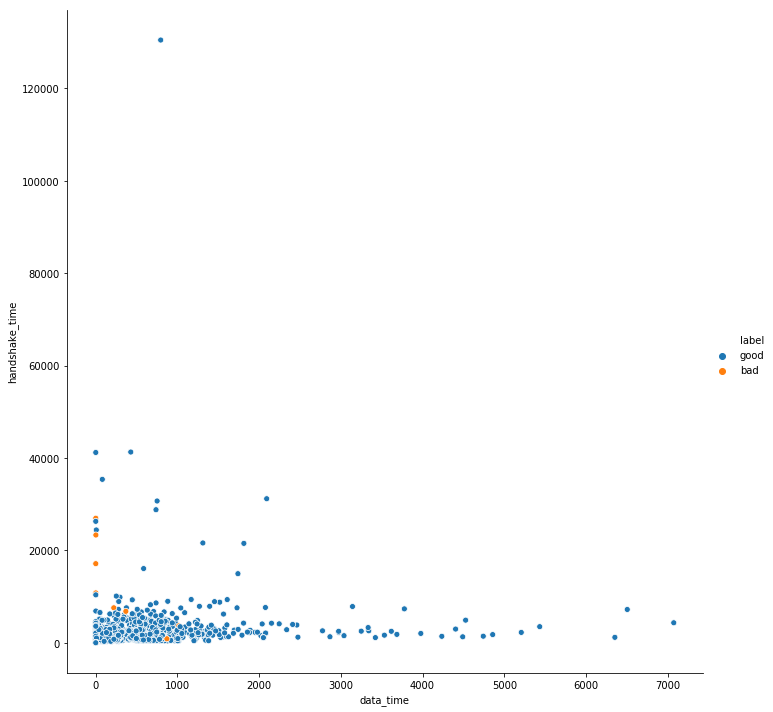

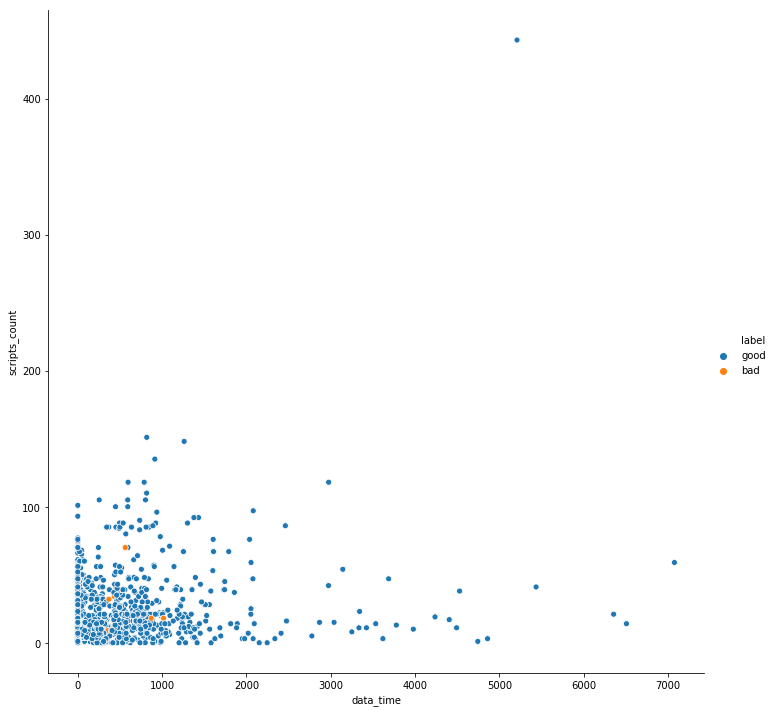

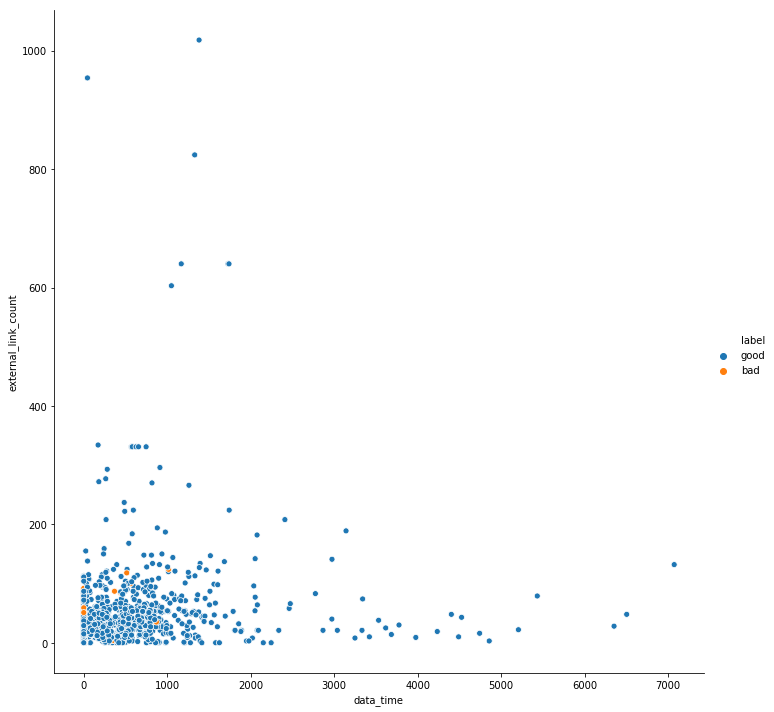

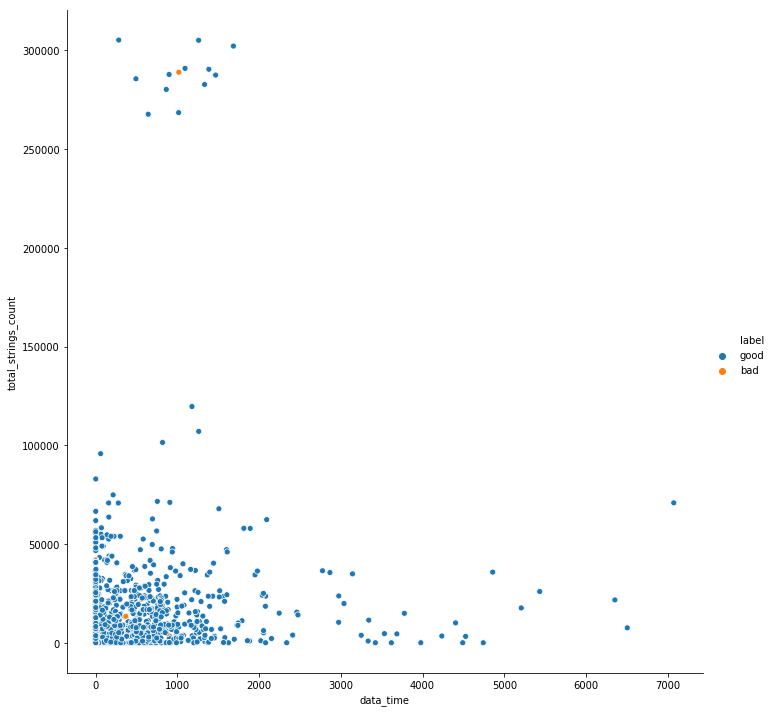

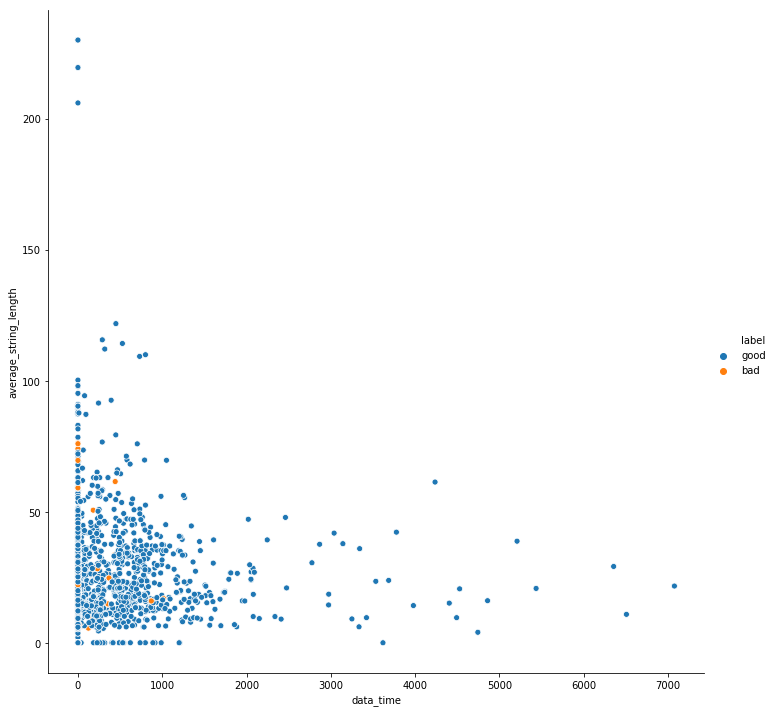

In [36]:
#from pairplot it is evident that facet grid has a lot of relation with other columns
sns.relplot(y="url_length", x='data_time',hue="label", data=data,height=10,aspect=1).savefig("url_len_dt.png")
sns.relplot(y="special_character_count", x='data_time',hue="label", data=data,height=10,aspect=1).savefig("s_c_c_dt.png")
sns.relplot(y="handshake_time", x='data_time',hue="label", data=data,height=10,aspect=1).savefig("s_c_c_dt.png")
sns.relplot(y="scripts_count", x='data_time',hue="label", data=data,height=10,aspect=1).savefig("s_c_dt.png")
sns.relplot(y="external_link_count", x='data_time',hue="label", data=data,height=10,aspect=1).savefig("e_l_c_dt.png")
sns.relplot(y="total_strings_count", x='data_time',hue="label", data=data,height=10,aspect=1).savefig("t_s_c_dt.png")
sns.relplot(y="average_string_length", x='data_time',hue="label", data=data,height=10,aspect=1).savefig("a_s_l_dt.png")


when url_length is less and data_time is more, there is less portion of bad and more portion of good
there should be less special character count in a benign link


In [30]:
data.keys()

Index(['label', 'url_length', 'special_character_count', 'having_ip_address',
       'dns_response_time', 'handshake_time', 'data_time', 'data_length',
       'redirect', 'protocol', 'http_status_code', 'server_name',
       'scripts_count', 'iframe_count', 'external_link_count',
       'total_strings_count', 'average_string_length', 'max_len_strings',
       'strings_above_avglength', 'whois_creation_date', 'whois_expiry_date',
       'whois_last_updated', 'whois_country', 'whois_city'],
      dtype='object')

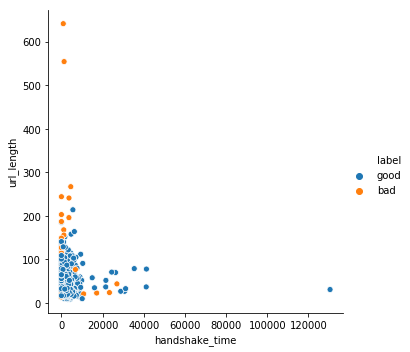

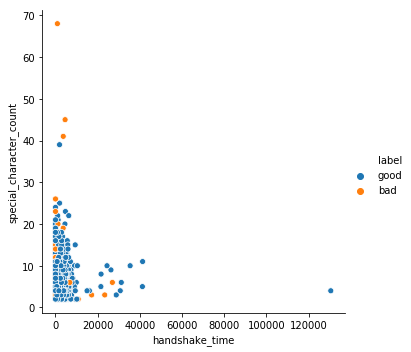

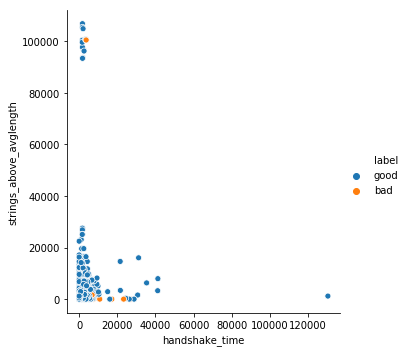

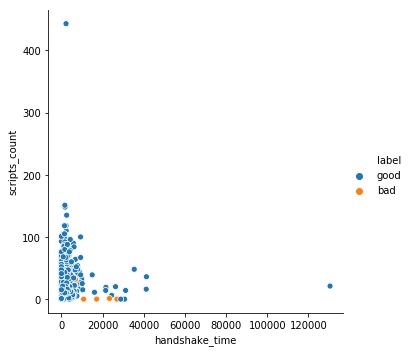

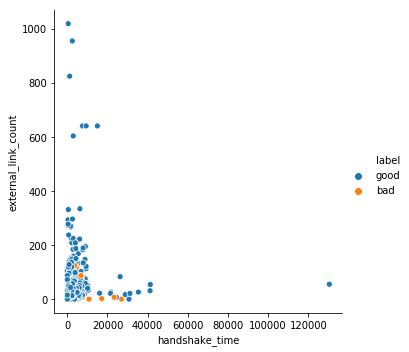

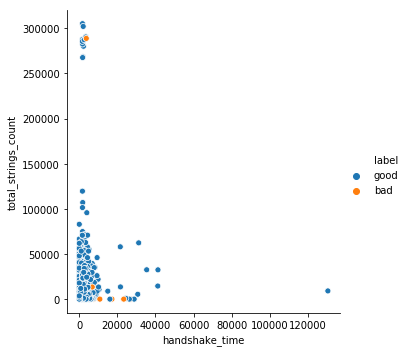

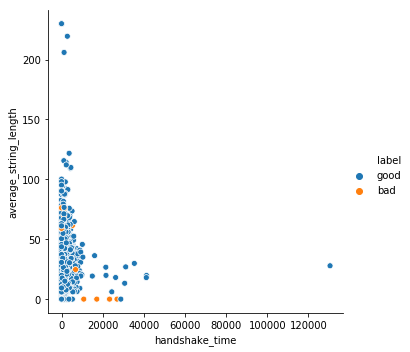

In [17]:
sns.relplot(y="url_length", x='handshake_time',hue="label", data=data).savefig("url_len_ht.png")
sns.relplot(y="special_character_count", x='handshake_time',hue="label", data=data).savefig("s_c_c_ht.png")
sns.relplot(y="strings_above_avglength", x='handshake_time',hue="label", data=data).savefig("s_a_a_ht.png")
sns.relplot(y="scripts_count", x='handshake_time',hue="label", data=data).savefig("s_c_ht.png")
sns.relplot(y="external_link_count", x='handshake_time',hue="label", data=data).savefig("e_l_c_ht.png")
sns.relplot(y="total_strings_count", x='handshake_time',hue="label", data=data).savefig("t_s_c_ht.png")
sns.relplot(y="average_string_length", x='handshake_time',hue="label", data=data).savefig("a_s_l_ht.png")